  # Customer Segmentation Project on Customer Personality Analysis # 

  The final project of Magic of Data: Data Science Advent calendar by @codingmermaid.ai

  You can find the full dataset here:

  https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis

## Library and module imports ##

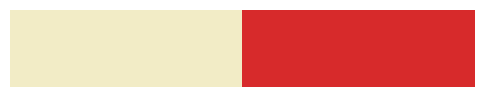

In [9]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

#ignoring the warnings while executing codes
import warnings
warnings.filterwarnings("ignore")

plt.rcParams['figure.figsize'] = (16,9)
plt.rcParams["figure.facecolor"] = "white"
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams["axes.facecolor"] ="white"
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['figure.frameon'] = True
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.bottom'] = True
plt.rcParams['axes.spines.left'] = True
plt.rcParams["font.family"] = "monospace";

colors = ["#B71C1B", "#D72A2B", "#F2ECC6", "#D5D68A", "#A6AD3C", "#798517"]
colors2 = ["#F2ECC6", "#D5D68A", "#A6AD3C", "#798517", "#D72A2B"]

# Create a Seaborn palette
palette = sns.color_palette(colors)

# Use sns.palplot for visualization
sns.palplot(palette)

# If you want a Matplotlib colormap for `colors2`:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(colors2)

# Example usage of the Matplotlib colormap
plt.imshow([[0, 1]], cmap=cmap, aspect='auto')
plt.axis('off')
plt.show()

## Importing the dataset into our project and listing first 5 rows to see what kind of data we're working with ##

In [13]:
df = pd.read_csv('marketing_campaign.csv', sep="\t")
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [15]:
df.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count      2240.000000  ...        2240.000000   2240.000000   2240.000000   
mean         37.525446  ...           5.316518      0.072768      0.074554   
std          54.628979  ...           2.426645      0.259813      0.262728   
min           0.000000  ...           0.000000      0.000000      0.000000   
25%           3.000000  ...           3.000000      0.000000      0.000000   
50%          12.000000  ...           6.000000      0.000000      0.000000   
75%          50.000000  ...           7.000000      0.000000      0.000000   
max         259.000000  ...          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2240.000000   2240.000000   2240.000000  2240.000000         2240.0   
mean       0.072768      0.064286      0.013393     0.009375            3.0   
std        0.259813      0.245316      0.114976     0.096391            0.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   

       Z_Revenue     Response  
count     2240.0  2240.000000  
mean        11.0     0.149107  
std          0.0     0.356274  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  

[8 rows x 26 columns]

In [17]:
print(f'The data has {df.shape[0]} rows and {df.shape[1]} columns')


The data has 2240 rows and 29 columns


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

## Handling Missing Values ##

We can see that the Income column has 24 missing values which we'll drop as they won't help us in our data preparation and preprocessing.

We can also see that the attribute called "Dt_Customer" is listed as an object which is wrong. It should be converted to Date given it gives us time when purchase was made.

In [22]:
df.isna().sum().sort_values(ascending =False)

Income                 24
ID                      0
NumDealsPurchases       0
Z_Revenue               0
Z_CostContact           0
Complain                0
AcceptedCmp2            0
AcceptedCmp1            0
AcceptedCmp5            0
AcceptedCmp4            0
AcceptedCmp3            0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
MntGoldProds            0
Year_Birth              0
MntSweetProducts        0
MntFishProducts         0
MntMeatProducts         0
MntFruits               0
MntWines                0
Recency                 0
Dt_Customer             0
Teenhome                0
Kidhome                 0
Marital_Status          0
Education               0
Response                0
dtype: int64

In [24]:
df = df.dropna()
print(f'Data dropped. Missing data: {df.isna().sum().sum()} and Remaining data: {df.shape[0]}')

Data dropped. Missing data: 0 and Remaining data: 2216


In [26]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'],format = '%d-%m-%Y')
print(f'Sucessfully converted the attribute Dt_Customer to Date time format')

Sucessfully converted the attribute Dt_Customer to Date time format


In [30]:
df.describe().select_dtypes(include='number').T.style.bar(
    subset=['mean', 'min', '50%'], color=colors[3]
).highlight_max(
    subset=['max'], color=colors[1]
).set_caption('Basic Stats of The Data')

In [32]:
#Droping columns
to_drop = ["ID"]
df = df.drop(to_drop, axis=1)

In [34]:
df = df.rename(columns = {'MntWines':'Wines','MntFruits':'Fruits',
       'MntMeatProducts':'Meat', 'MntFishProducts':'Fish', 'MntSweetProducts':'Sweet',
       'MntGoldProds':'Gold'})

In [36]:
df.dtypes.value_counts()

int64             24
object             2
float64            1
datetime64[ns]     1
Name: count, dtype: int64

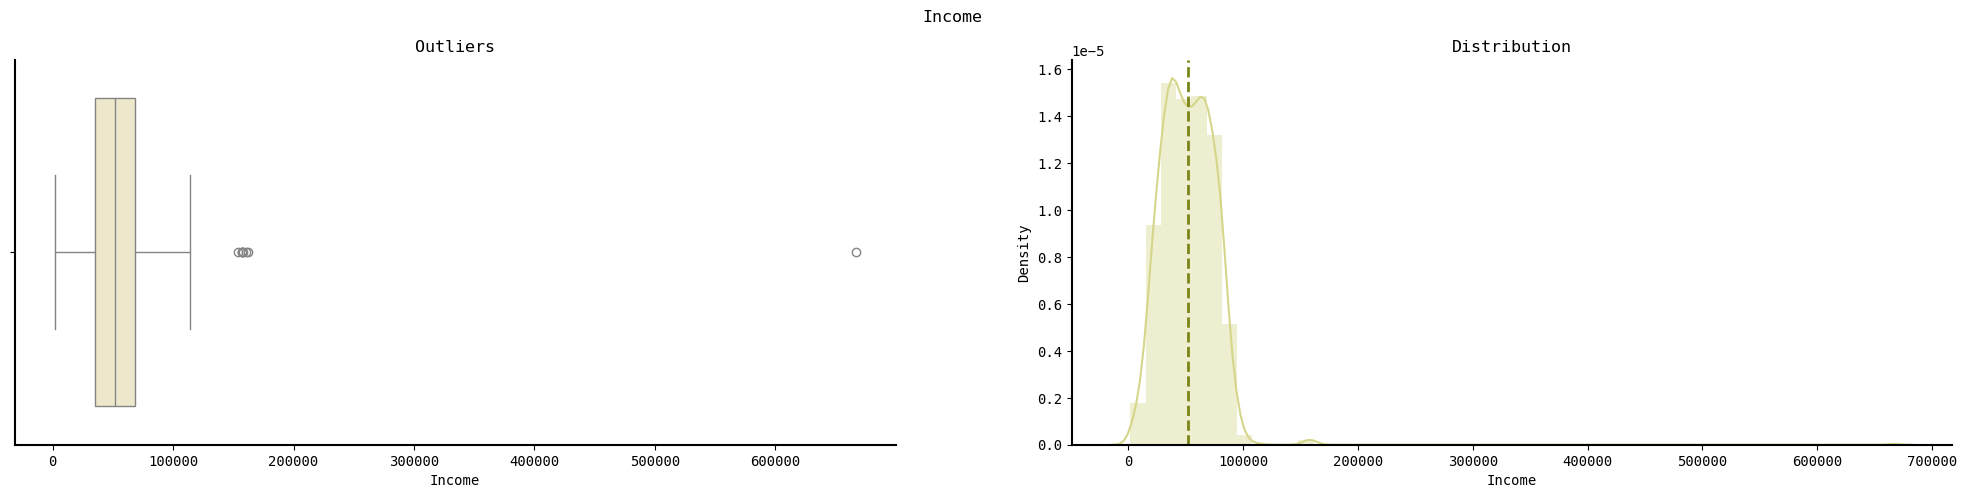

In [38]:
f, axes = plt.subplots(1, 2, figsize=(25,5))
f.suptitle('Income')

# Boxplot
sns.boxplot(data = df, x= 'Income', color=colors[2], ax=axes[0])
axes[0].set_title('Outliers')

# Distplot
sns.distplot(df['Income'], color=colors[3],ax=axes[1])
plt.axvline(x=df['Income'].mean(), color=colors[5], linestyle='--', linewidth=2)
axes[1].set_title('Distribution')

plt.show();

### 1. Setting Up Subplots ###

- plt.subplots(1, 2): Creates a figure (f) with 1 row and 2 columns of subplots, resulting in two axes (axes[0] and axes[1]).
- figsize=(25, 5): Sets the size of the entire figure to 25 inches wide and 5 inches tall.
- f.suptitle('Income'): Adds a main title ("Income") at the top of the figure.

### 2. Boxplot (Outliers Detection) ###

- sns.boxplot(): Creates a boxplot to visualize the distribution of the Income column.
data = df: Specifies the DataFrame df.
- x='Income': Plots the Income variable on the x-axis.
- color=colors[2]: Sets the color of the boxplot to the third color in the colors palette.
- ax=axes[0]: Renders the plot in the first subplot (left side).
- axes[0].set_title('Outliers'): Sets the title of the first subplot to "Outliers."

### 3. Distplot (Income Distribution) ###

- sns.distplot(): Creates a combined histogram and kernel density estimation (KDE) plot to visualize the distribution of Income.
- df['Income']: Specifies the Income column.
- color=colors[3]: Sets the histogram and KDE line color to the fourth color in colors.
- ax=axes[1]: Renders the plot in the second subplot (right side).



The goal is to analyze the Income column in two ways:

- Boxplot: Identifies the presence of outliers and the overall spread of the data.
- Distribution Plot: Shows the shape of the data distribution (e.g., normal, skewed) and overlays the mean for context.

## EDA of the Features ##

In [42]:
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue"]
df = df.drop(to_drop, axis=1)

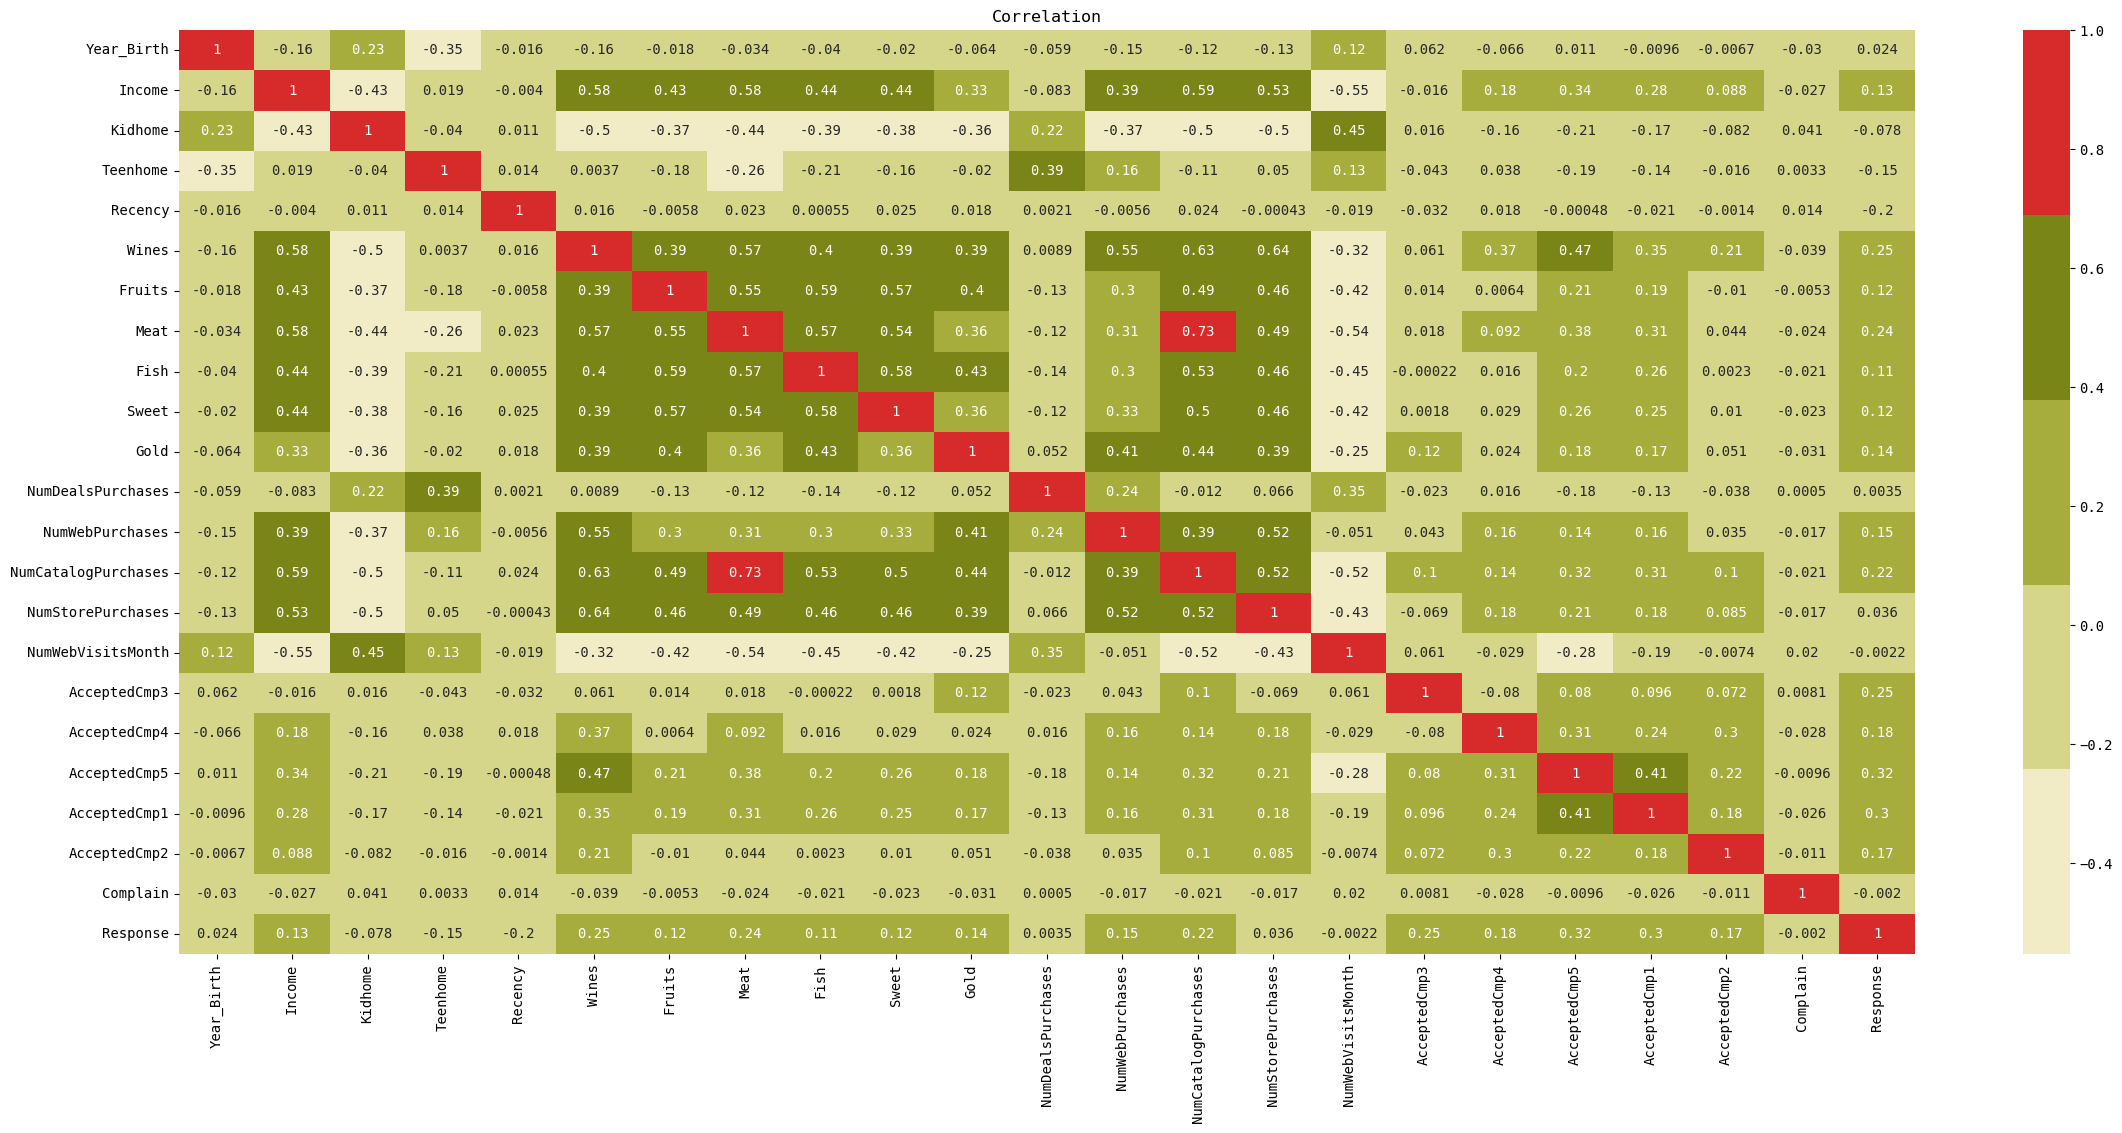

In [46]:
plt.figure(figsize=(28, 12))
plt.title('Correlation')

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Calculate correlation and plot
sns.heatmap(numeric_df.corr(), annot=True, cmap=cmap)
plt.show()

## Data Preprocessing ##

In [49]:
from sklearn import preprocessing

In [51]:
cat = []
for i in df.columns:
    if (df[i].dtypes == "object"):
        cat.append(i)
        
print("Object Columns",cat)

Object Columns ['Education']


In [53]:
#Encoding categorical labels
le=preprocessing.LabelEncoder()

for i in cat:
    df[i]=df[[i]].apply(le.fit_transform)
    
print("features converted to numerical")

features converted to numerical


In [55]:
from sklearn.preprocessing import StandardScaler

#Creating a copy of data
ndf = df.copy()
# creating a subset of dataframe by dropping the features on deals accepted and promotions
rem_col = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ndf = ndf.drop(rem_col, axis=1)

In [57]:
#Scaling
scaler = StandardScaler()
scaler.fit(ndf)

scaled_data = pd.DataFrame(scaler.transform(ndf),columns= ndf.columns )
print("All features are now scaled")

All features are now scaled


## Dimensionality Reduction ##

Dimensionality reduction simplifies datasets by reducing the number of features while retaining essential information. It improves computational efficiency, reduces overfitting, and enhances visualization for high-dimensional data. Common methods include PCA and t-SNE.

Principal Component Analysis (PCA) is a dimensionality reduction technique that transforms features into orthogonal components, preserving maximum variance. It's used to simplify data, reduce noise, and improve model performance.


In [62]:
from sklearn.decomposition import PCA

#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_data)
PCA_ds = pd.DataFrame(pca.transform(scaled_data), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T


count          mean       std       min       25%       50%       75%  \
col1  2216.0 -5.450914e-17  2.468269 -5.126543 -2.291454 -0.606909  2.155330   
col2  2216.0 -3.206420e-17  1.419328 -3.045534 -1.134921 -0.144855  1.039602   
col3  2216.0 -2.244494e-17  1.160212 -5.564128 -0.684052  0.012772  0.775273   

           max  
col1  6.556611  
col2  4.874924  
col3  4.377914

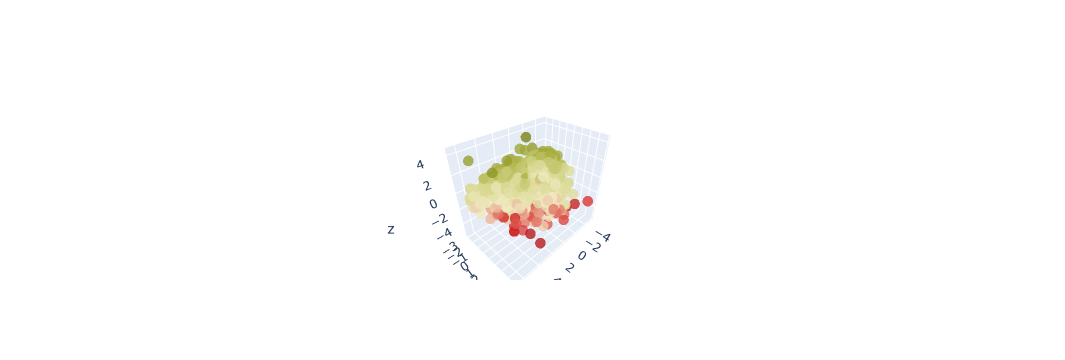

In [65]:
import plotly.graph_objects as go
import numpy as np

x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]

fig = go.Figure(data=[go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=6,
        color=z,                
        colorscale=colors,   
        opacity=0.8
    )
)])

fig.show()

## Clustering ##

Elbow method and K-means clustering

Elbow Method:


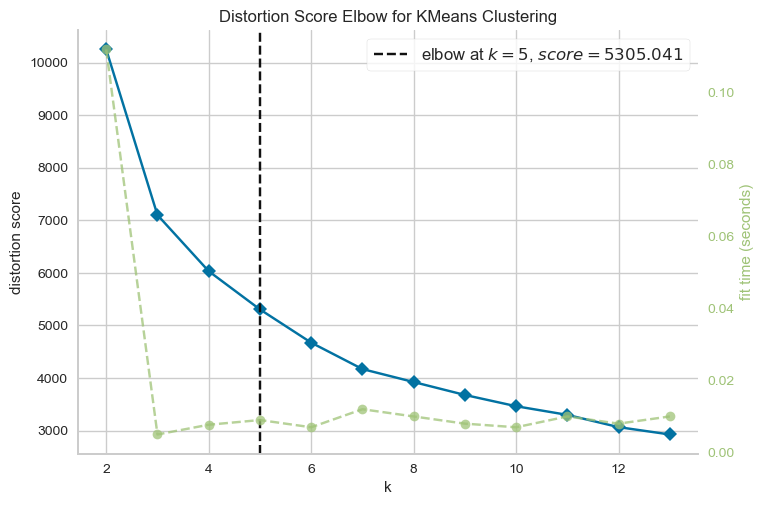

In [70]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method:')
Elbow_M = KElbowVisualizer(KMeans(), k=13)
Elbow_M.fit(PCA_ds)
Elbow_M.show();

In [72]:
from sklearn.cluster import AgglomerativeClustering

#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= yhat_AC

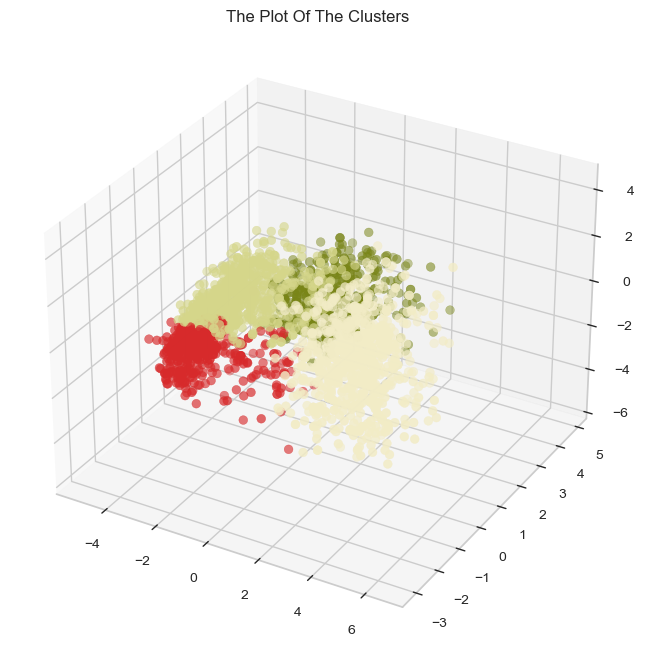

In [74]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

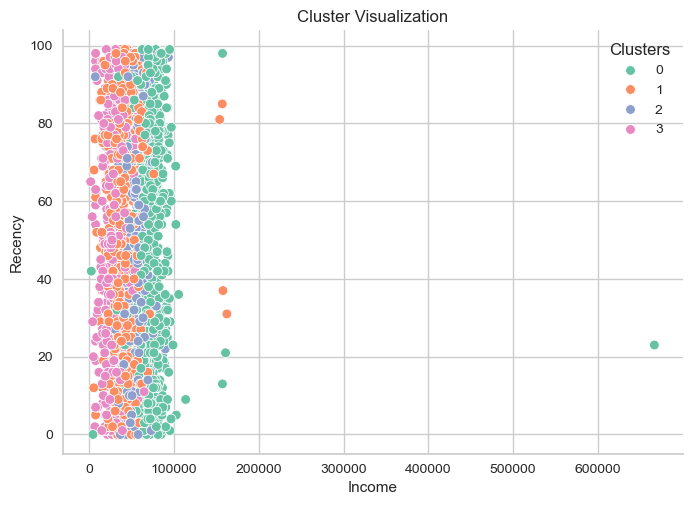

In [88]:
features = ['Income', 'Recency', 'Kidhome']

# Scatter Plot
sns.scatterplot(data=df, x='Income', y='Recency', hue='Clusters', palette='Set2')
plt.title('Cluster Visualization')
plt.show()